# Fraud Transaction Detection

import some libraries

In [311]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [312]:
df=pd.read_csv('creditcard.csv')

In [313]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [314]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [316]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [317]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

0 --> Normal Transaction
1 --> fraudulent transaction

separating the data for analysis

In [318]:
legit=df[df.Class==0]
fraud=df[df.Class==1]

In [319]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [320]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [321]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [322]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

In [323]:
legit_sample=legit.sample(n=492)

In [324]:
new_df=pd.concat([legit_sample,fraud],axis=0)

In [325]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
102734,68337.0,1.275315,0.150205,0.179808,0.314565,-0.053373,-0.204028,-0.084285,0.015877,-0.100854,...,-0.264431,-0.815085,0.026379,-0.512560,0.284899,0.129665,-0.036425,-0.000353,1.79,0
221848,142723.0,-0.609975,1.111377,-0.877694,-1.085498,1.633823,0.091268,1.153240,-0.297472,0.813557,...,-0.578334,-0.927768,0.060929,-0.540705,-0.226015,0.117675,0.120090,-0.209976,9.82,0
181422,124966.0,1.990670,0.539420,-2.312888,0.673966,0.585180,-1.448916,0.267310,-0.249703,0.226148,...,0.161727,0.644851,-0.044027,-0.193802,0.204917,-0.120528,0.020234,-0.001828,1.00,0
163590,116071.0,-3.017546,3.427747,-1.665418,-1.145119,-0.132192,-1.182398,0.727843,0.149635,2.390029,...,0.009406,1.103819,0.137768,1.069130,-0.166342,-0.241113,1.576548,0.834218,1.79,0
235851,148562.0,1.942597,-0.418673,-0.219942,0.380907,-0.827543,-0.519341,-0.647833,0.127349,1.216904,...,-0.140489,-0.341716,0.392042,-0.004144,-0.514645,-0.642510,0.023639,-0.043560,2.49,0


In [326]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [327]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [328]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96088.548780,-0.022695,0.047421,0.003134,-0.041014,-0.019790,0.111893,0.000425,0.021745,0.019683,...,-0.007795,0.046283,0.016568,-0.011371,-0.03652,-0.002515,-0.026659,0.005915,0.009885,89.969228
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


# Visualization 


C:\Users\PROF\AppData\Local\Temp\ipykernel_10972\2117313833.py:10: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t0[feature], bw=0.5, label="Class = 0", fill=True, color='blue', ax=ax[i // 4, i % 4])
C:\Users\PROF\AppData\Local\Temp\ipykernel_10972\2117313833.py:11: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t1[feature], bw=0.5, label="Class = 1", fill=True, color='green', ax=ax[i // 4, i % 4])
C:\Users\PROF\AppData\Local\Temp\ipykernel_10972\2117313833.py:10: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the doc

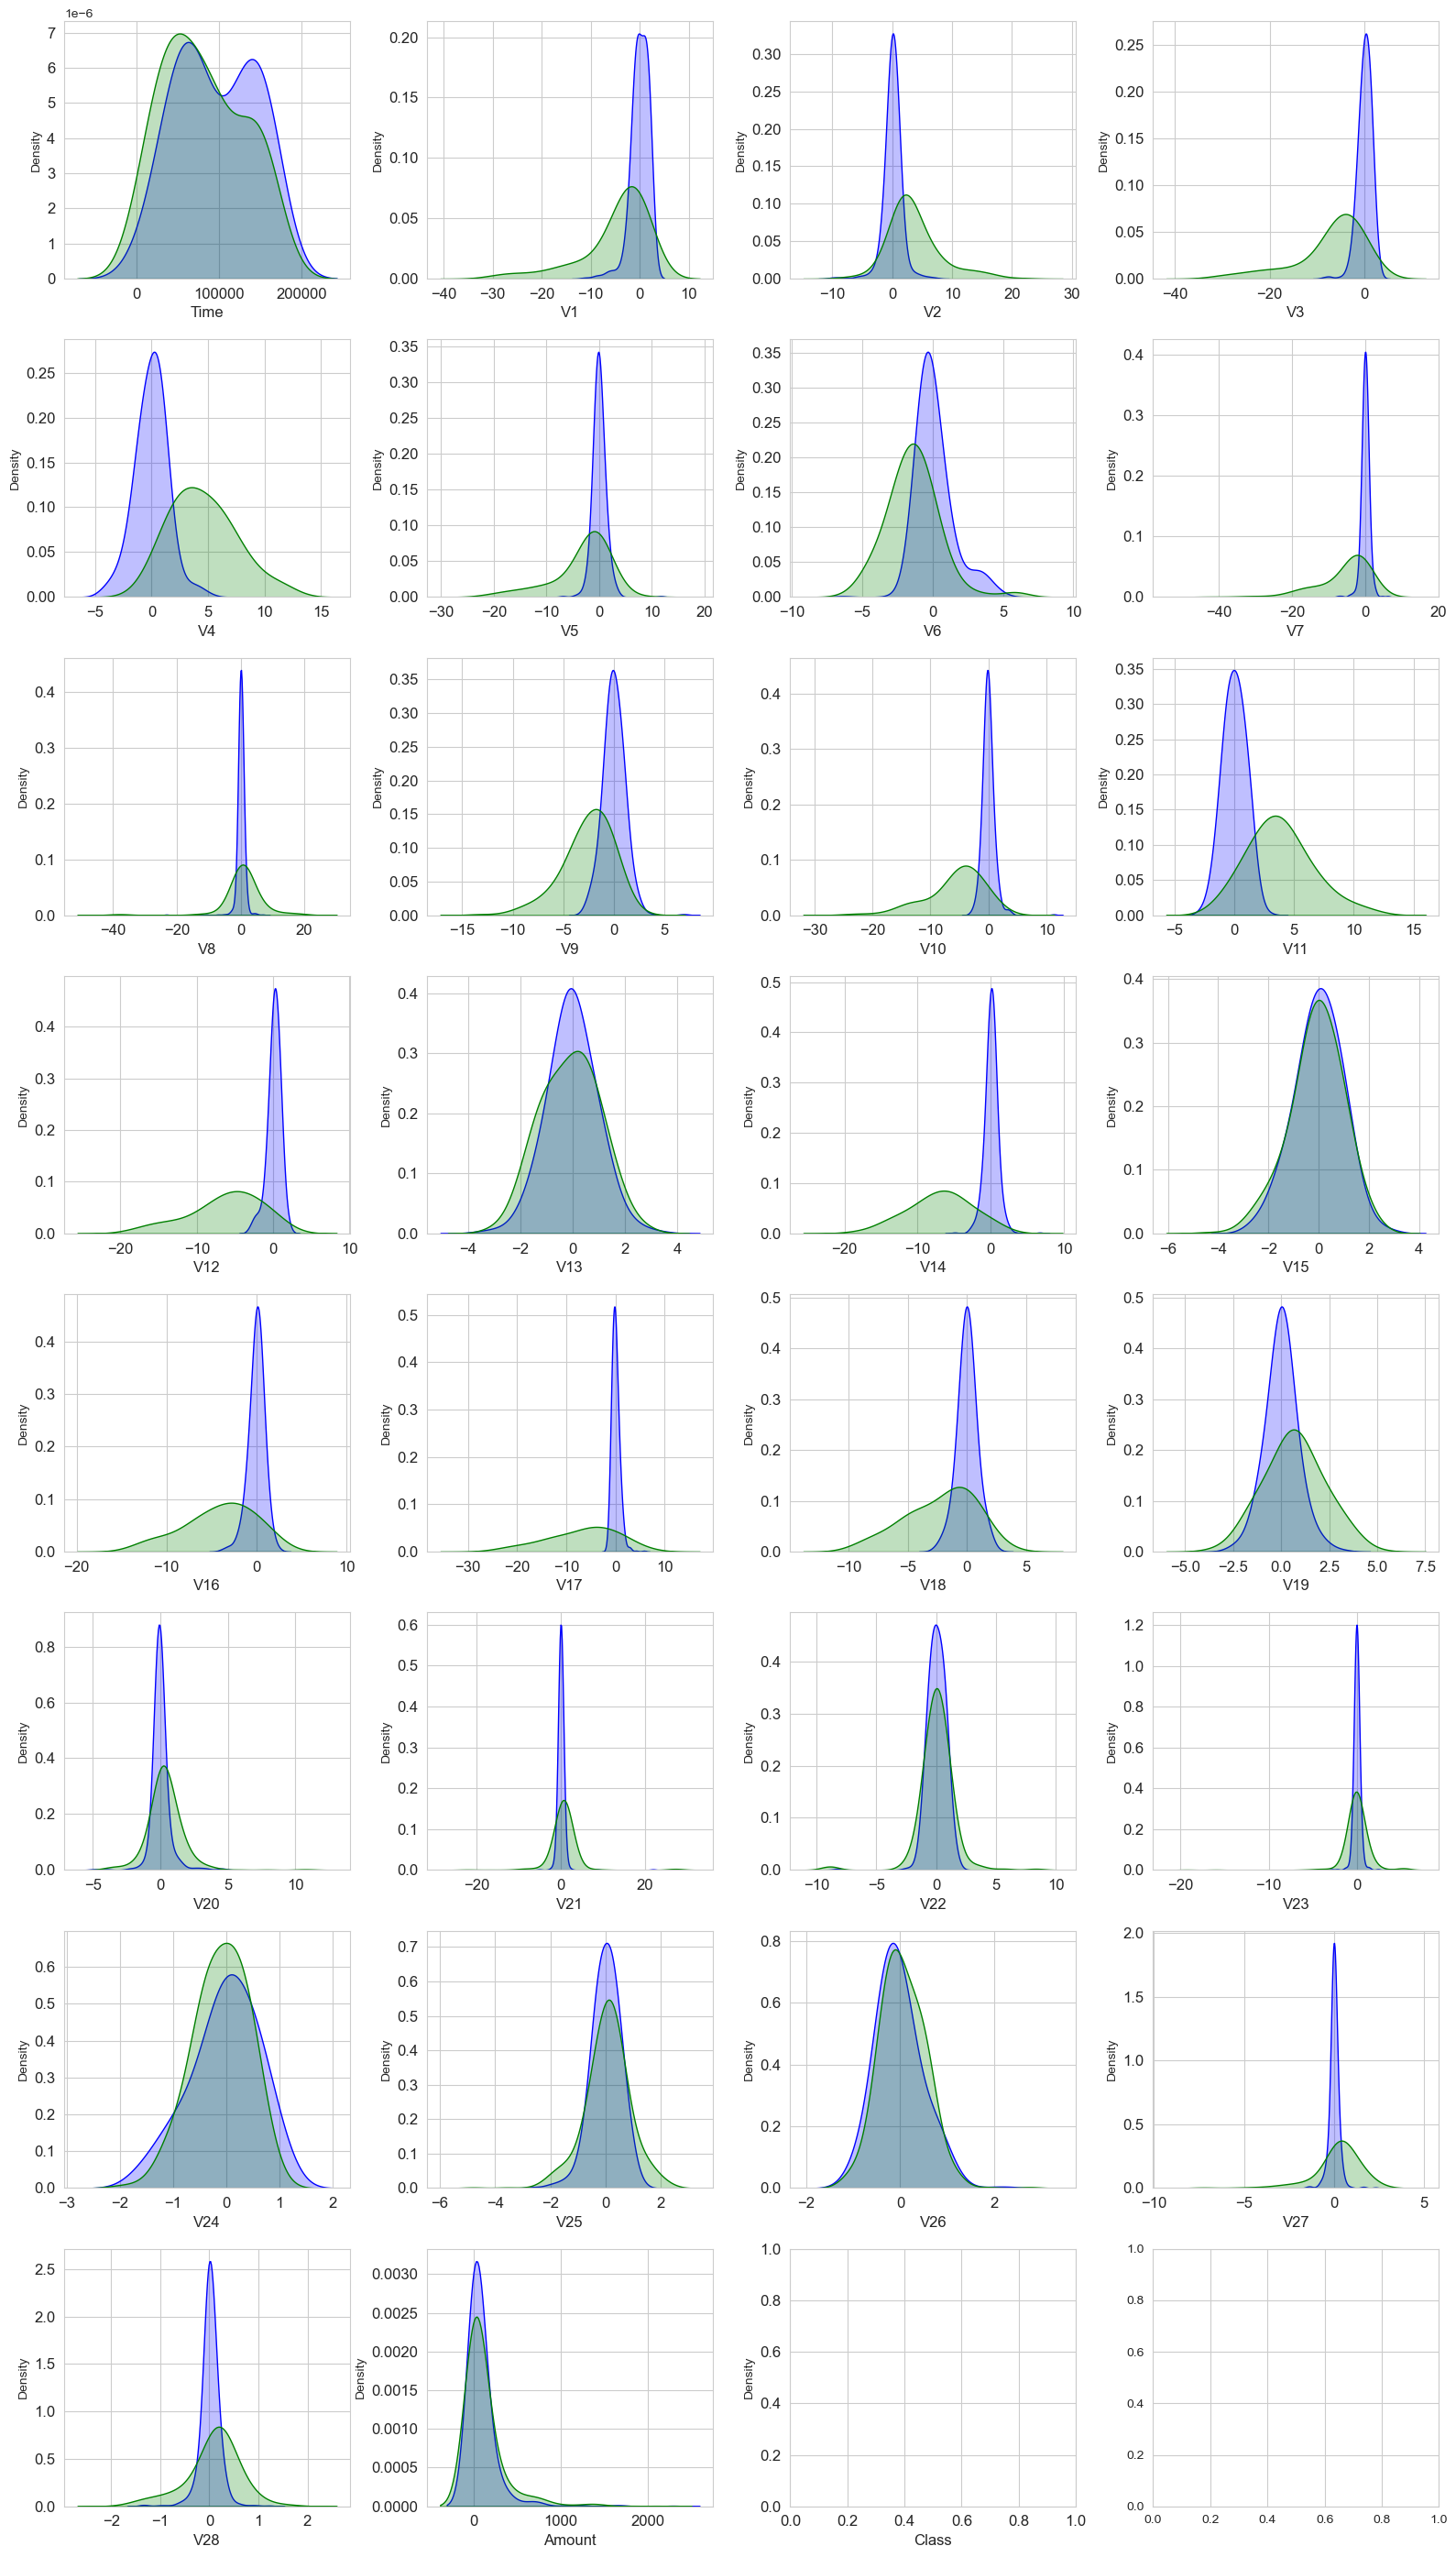

In [329]:
var = new_df.columns.values

t0 = new_df.loc[new_df['Class'] == 0]
t1 = new_df.loc[new_df['Class'] == 1]

sns.set_style('whitegrid')
fig, ax = plt.subplots(8, 4, figsize=(16, 28))

for i, feature in enumerate(var):
    sns.kdeplot(t0[feature], bw=0.5, label="Class = 0", fill=True, color='blue', ax=ax[i // 4, i % 4])
    sns.kdeplot(t1[feature], bw=0.5, label="Class = 1", fill=True, color='green', ax=ax[i // 4, i % 4])
    ax[i // 4, i % 4].set_xlabel(feature, fontsize=12)
    ax[i // 4, i % 4].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()


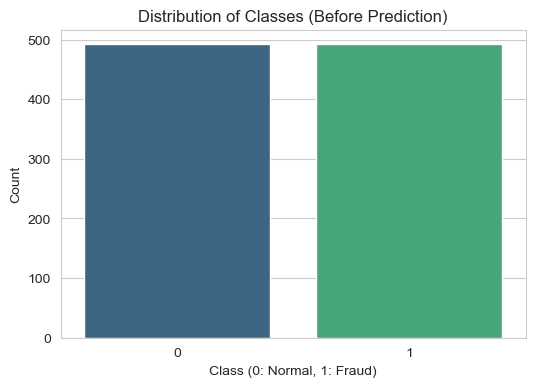

In [330]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=new_df, palette='viridis')
plt.title("Distribution of Classes (Before Prediction)")
plt.xlabel("Class (0: Normal, 1: Fraud)")
plt.ylabel("Count")
plt.show()


# corrolation matrix

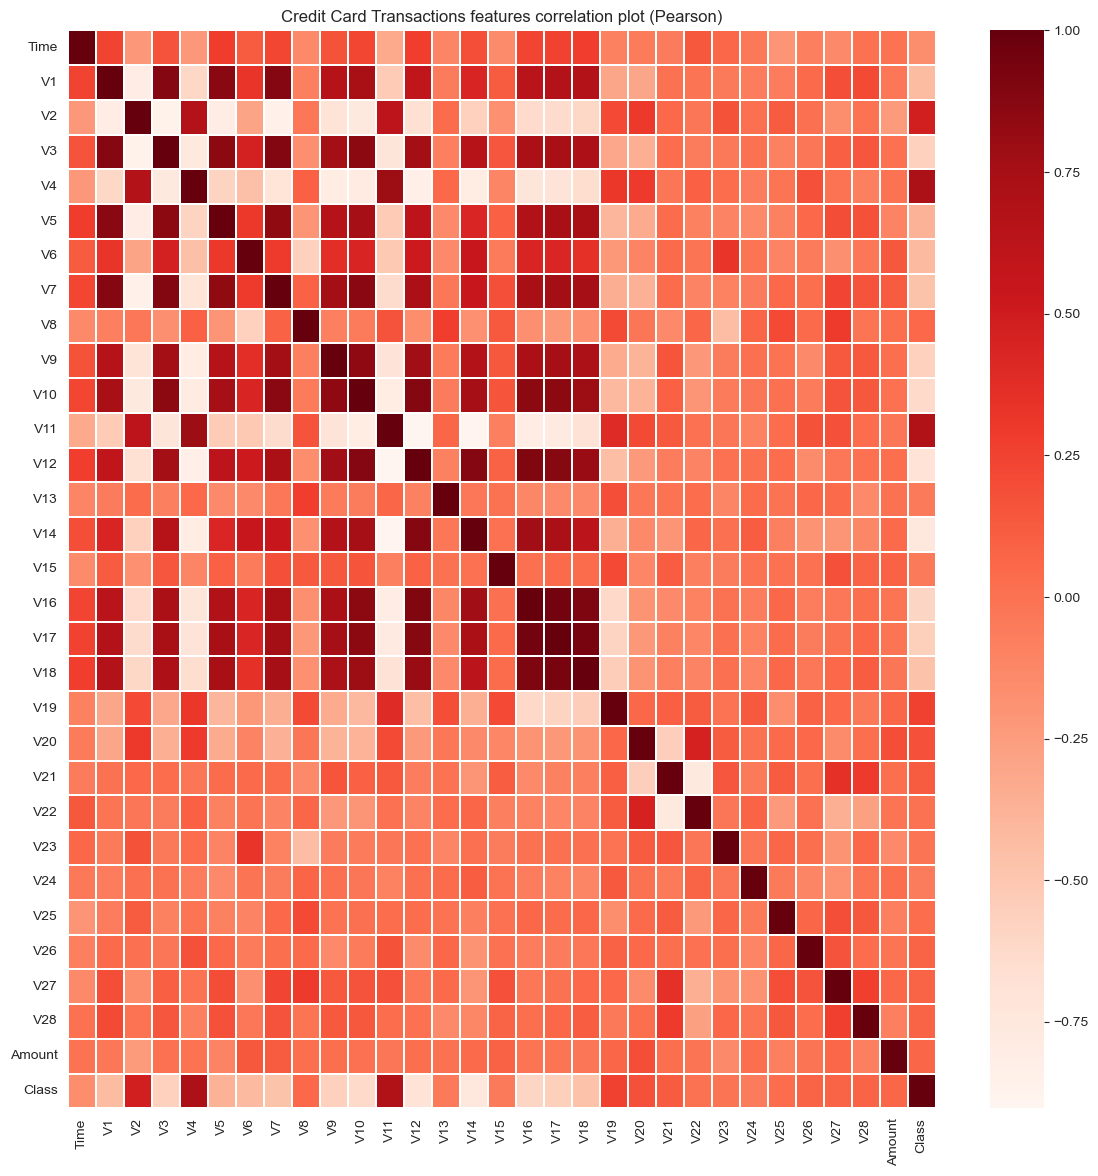

In [331]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = new_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

Splitting the data into Features & Targets

In [332]:
x=new_df.drop(columns='Class',axis=1)
y=new_df['Class']

In [333]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
102734   68337.0  1.275315  0.150205  0.179808  0.314565 -0.053373 -0.204028   
221848  142723.0 -0.609975  1.111377 -0.877694 -1.085498  1.633823  0.091268   
181422  124966.0  1.990670  0.539420 -2.312888  0.673966  0.585180 -1.448916   
163590  116071.0 -3.017546  3.427747 -1.665418 -1.145119 -0.132192 -1.182398   
235851  148562.0  1.942597 -0.418673 -0.219942  0.380907 -0.827543 -0.519341   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [334]:
print(y)

102734    0
221848    0
181422    0
163590    0
235851    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [335]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [336]:
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


# Model Training


# Logistic Regression

In [337]:
modellg=LogisticRegression()

training the Logistic Regression Model with Training Data

In [338]:
modellg.fit(x_train, y_train)

LogisticRegression()

Model Evaluation


accuracy on training data

In [339]:
X_train_prediction1 = modellg.predict(x_train)
training_data_accuracylg = accuracy_score(X_train_prediction1, y_train)

print('Accuracy on Training data : ', training_data_accuracylg)

Accuracy on Training data :  0.9428208386277002


 accuracy on test data

In [340]:
X_test_prediction1 = modellg.predict(x_test)
test_data_accuracy1 = accuracy_score(X_test_prediction1, y_test)

print('Accuracy score on Test Data : ', test_data_accuracy1)

Accuracy score on Test Data :  0.949238578680203


# XGBoost classifier

In [341]:
xgb_model = XGBClassifier(random_state=2)  
xgb_model.fit(x_train, y_train)


X_train_prediction_xgb = xgb_model.predict(x_train)
training_data_accuracy_xgb = accuracy_score(X_train_prediction_xgb, y_train)

print('Accuracy on Training data for XGBoost: ', training_data_accuracy_xgb)

X_test_prediction_xgb = xgb_model.predict(x_test)
test_data_accuracy_xgb = accuracy_score(X_test_prediction_xgb, y_test)

print('Accuracy score on Test Data for XGBoost: ', test_data_accuracy_xgb)


Accuracy on Training data for XGBoost:  1.0
Accuracy score on Test Data for XGBoost:  0.9441624365482234


# RandomForestClassifier

In [342]:
rf_model = RandomForestClassifier(random_state=2)  
rf_model.fit(x_train, y_train)

X_train_prediction_rf = rf_model.predict(x_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf, y_train)
print('Accuracy on Training data for Random Forest: ', training_data_accuracy_rf)


X_test_prediction_rf = rf_model.predict(x_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction_rf, y_test)
print('Accuracy score on Test Data for Random Forest: ', test_data_accuracy_rf)


Accuracy on Training data for Random Forest:  1.0
Accuracy score on Test Data for Random Forest:  0.9543147208121827


In [343]:
decision_tree_model = DecisionTreeClassifier(random_state=2)
decision_tree_model.fit(x_train, y_train)

X_train_prediction_dt = decision_tree_model.predict(x_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction_dt, y_train)
print('Accuracy on Training data for Decision Tree: ', training_data_accuracy_dt)

X_test_prediction_dt = decision_tree_model.predict(x_test)
test_data_accuracy_dt = accuracy_score(X_test_prediction_dt, y_test)
print('Accuracy score on Test Data for Decision Tree: ', test_data_accuracy_dt)


Accuracy on Training data for Decision Tree:  1.0
Accuracy score on Test Data for Decision Tree:  0.8883248730964467


# After prediction

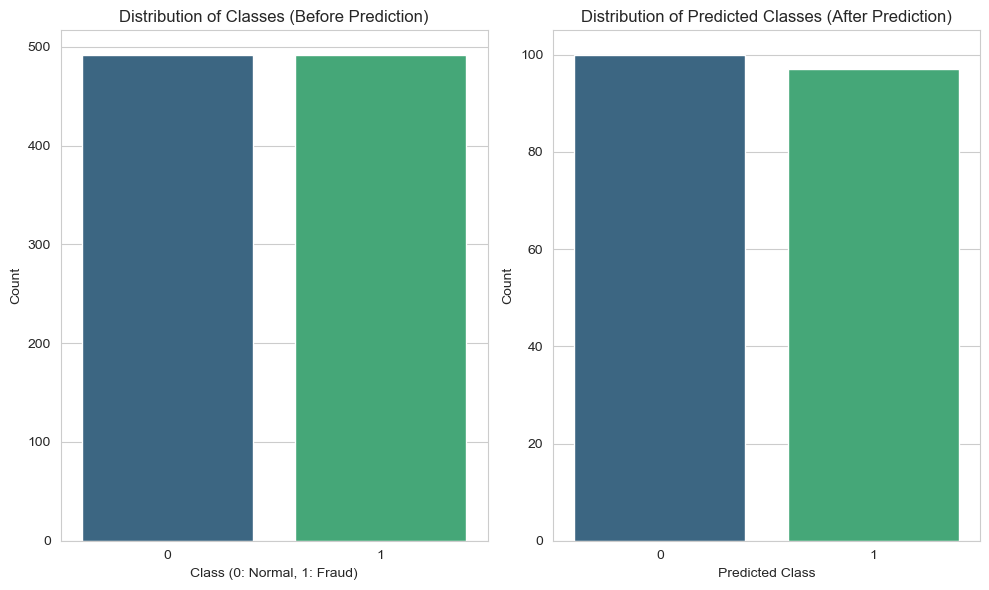

In [344]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Class', data=new_df, palette='viridis')
plt.title("Distribution of Classes (Before Prediction)")
plt.xlabel("Class (0: Normal, 1: Fraud)")
plt.ylabel("Count")


plt.subplot(1, 2, 2)
sns.countplot(x=X_test_prediction_rf, palette='viridis')  
plt.title("Distribution of Predicted Classes (After Prediction)")
plt.xlabel("Predicted Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


# Confusion Matrix

Confusion Matrix:
[[93  2]
 [ 7 95]]


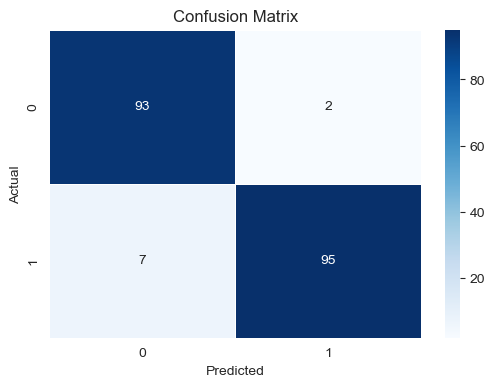

In [345]:
conf_matrix = confusion_matrix(y_test,X_test_prediction_rf )
print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [346]:
# Save prediction results to a CSV file
prediction_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction_rf
})

prediction_results.to_csv('prediction_results.csv', index=False)
